### Table of contents

1) Importing the Data set.<br>
2) Security Implications.<br>
3) Regional Segmentation of Data.<br>
4) Exclusion Flag. <br>
5) Customer Profiling. <br>
6) Visualization showing distribution of profiles. <br>
7) Descriptive statistics of customer profile. <br>
8) Comparing Customer profiles with Regions and Departments. <br>


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creating the path variable
path = r'C:\Users\Arjun\Documents\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Arjun\\Documents\\Instacart Basket Analysis'

In [4]:
# Importing the merged data set
instacart_with_customers = pd.read_pickle(os.path.join(path,'Data','Prepared Data','instacart_with_customers.pkl'))

In [5]:
#Validating the data set
instacart_with_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer.,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer.,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer.,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer.,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer.,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# checking the dimensions
instacart_with_customers.shape

(32404859, 33)

### Question 2

**PII data Implications**


Customers first and last name are fields which forms part of PII data. Hence, these columns are being removed from the data set.

In [7]:
instacart_with_customers.drop(['first_name','last_name','_merge','prior_order_median'], axis = 1, inplace = True)

In [8]:
#Checking the updated data set
instacart_with_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,average_price,spending_flag,order_frequency_flag,gender,state,age,date_joined,number_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,6.367797,Low Spender,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,6.367797,Low Spender,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,6.367797,Low Spender,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,6.367797,Low Spender,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,6.367797,Low Spender,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
#Checking the data types
instacart_with_customers.dtypes

order_id                   int64
user_id                   object
order_number               int64
order_day_of_week          int64
order_hour_of_day          int64
days_since_last_order    float64
product_id                 int64
add_to_cart_order          int64
reordered                  int64
product_name              object
aisle_id                   int64
department_id              int64
prices                   float64
price_range_loc           object
busiest_day               object
Busiest_days              object
busiest_period_of_day     object
max_order                  int64
loyalty_flag              object
average_price            float64
spending_flag             object
order_frequency_flag      object
gender                    object
state                     object
age                        int64
date_joined               object
number_dependents          int64
marital_status            object
income                     int64
dtype: object

### Regional Segmentation of data

In [10]:
#First let's create lists for the Regions by adding states as contents of lists
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
#We are using loc function to move the states into the Region for the whole dataset
instacart_with_customers.loc[instacart_with_customers['state'].isin(northeast),'region'] = 'NorthEast'
instacart_with_customers.loc[instacart_with_customers['state'].isin(midwest),'region'] = 'MidWest'
instacart_with_customers.loc[instacart_with_customers['state'].isin(south),'region'] = 'South'
instacart_with_customers.loc[instacart_with_customers['state'].isin(west),'region'] = 'West'

In [12]:
#Validating the Region column in the dataset
instacart_with_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency_flag,gender,state,age,date_joined,number_dependents,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low Spender,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low Spender,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low Spender,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low Spender,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low Spender,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South


In [13]:
# Frequency Table
instacart_with_customers['region'].value_counts(dropna = False)

South        10791885
West          8292913
MidWest       7597325
NorthEast     5722736
Name: region, dtype: int64

Text(0.5, 1.0, 'Number of Customers By Region')

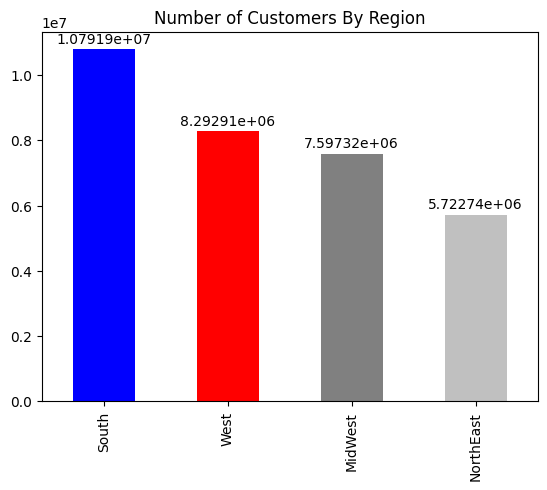

In [14]:
# Creating a bar plot to show the customers of the company across Regions
customer_region = instacart_with_customers['region'].value_counts(dropna = False).plot.bar(color = ['blue','red','gray','silver'])
for container in customer_region.containers:
    customer_region.bar_label(container,padding=2)
plt.title('Number of Customers By Region')

In [15]:
#Saving the above visualization locally by exporting the above chart
customer_region.figure.savefig(os.path.join(path,'Analysis','Visualizations','customers_region_bar.png'),bbox_inches='tight')

### Question 3.2 - Spending Habits between Different US Regions

In [16]:
#Checking the difference in spending habits between the Regions
crosstab_spending_habits_region = pd.crosstab(instacart_with_customers['region'],instacart_with_customers['spending_flag'],dropna= False)

In [43]:
crosstab_spending_habits_region

spending_flag,High Spender,Low Spender
region,,
MidWest,29265,7568060
NorthEast,18642,5704094
South,40579,10751306
West,31223,8261690


Text(0.5, 1.0, 'Spending Habits and Regions')

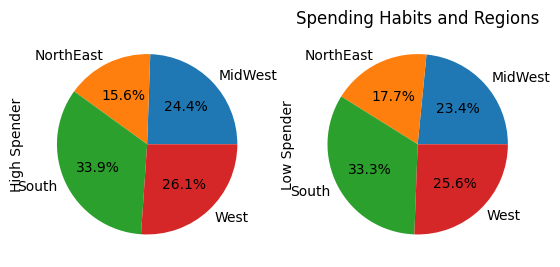

In [61]:
ba = crosstab_spending_habits_region.plot(kind = 'pie',subplots = True,autopct = '%1.1f%%', legend = None)

plt.title('Spending Habits and Regions')


In [1]:
#Saving the above visualization locally by exporting the above chart
#ba.figure.savefig(os.path.join(path,'Analysis','Visualizations','Spending_Habits_region_bar.png'),bbox_inches='tight')

Analysis of the above spending Habits <br>
1) The high spenders are higher in number in South, but proportionally slightly higher in the MidWest. <br>
2) Based on the Cross Tab analysis, there does not seem to be very different spending habits in Regions with proportion to their population spending.

**Region and Customer Base**

In [25]:
#Checking the customer pattern between the Regions
crosstab_customers_region = pd.crosstab(instacart_with_customers['loyalty_flag'],instacart_with_customers['region'],dropna= False)

In [27]:
crosstab_customers_region

region,MidWest,NorthEast,South,West
loyalty_flag,,,,
Loyal Customer,2373774,1841785,3405844,2662690
New Customer,1472573,1100207,2074410,1596800
Regular Customer,3750978,2780744,5311631,4033423


Text(0, 0.5, 'Number of Customers')

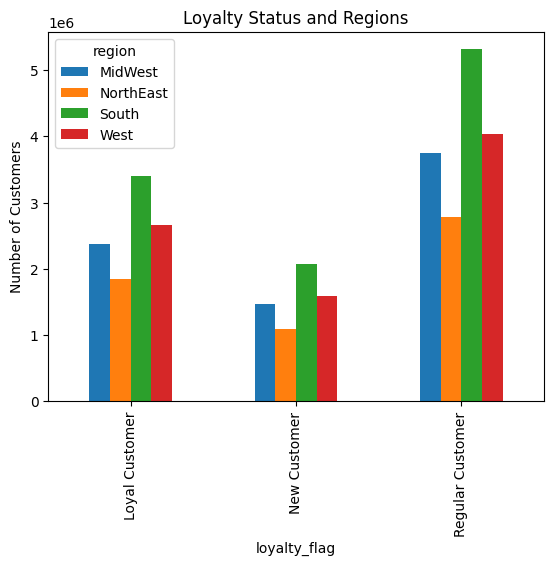

In [33]:
a = crosstab_customers_region.plot(kind = 'bar')
    
plt.title('Loyalty Status and Regions')
plt.ylabel('Number of Customers')

In [34]:
#Saving the Visualization
a.figure.savefig(os.path.join(path,'Analysis','Visualizations','Loyalty_regions.png'),bbox_inches='tight')

### Question 4 - Exclusion Flag for Low Activity Customers

In [18]:
instacart_with_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int64  
 1   user_id                object 
 2   order_number           int64  
 3   order_day_of_week      int64  
 4   order_hour_of_day      int64  
 5   days_since_last_order  float64
 6   product_id             int64  
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   product_name           object 
 10  aisle_id               int64  
 11  department_id          int64  
 12  prices                 float64
 13  price_range_loc        object 
 14  busiest_day            object 
 15  Busiest_days           object 
 16  busiest_period_of_day  object 
 17  max_order              int64  
 18  loyalty_flag           object 
 19  average_price          float64
 20  spending_flag          object 
 21  order_frequency_flag   object 
 22  gender          

In [19]:
#By Viewing the columns, we can see that there is a max_order column which determines the number of orders
instacart_with_customers['max_order'].head()

0    10
1    10
2    10
3    10
4    10
Name: max_order, dtype: int64

In [20]:
#Creating an Exclusion Flag for Customers with less than 5 Orders
instacart_with_customers.loc[instacart_with_customers['max_order'] < 5, 'Order_Flag'] = 'Low-Activity-Customer'

In [21]:
instacart_with_customers.loc[instacart_with_customers['max_order'] >= 5, 'Order_Flag'] = 'High-Activity-Customer'

In [22]:
#Validate the Exclusion Flag Logic in the dataset
instacart_with_customers.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_dependents,marital_status,income,region,Order_Flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity-Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity-Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity-Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity-Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity-Customer
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity-Customer
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity-Customer
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity-Customer
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity-Customer
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,High-Activity-Customer


In [23]:
# Checking the Frequency distribution of the Exclusion Flag
instacart_with_customers['Order_Flag'].value_counts(dropna = False)

High-Activity-Customer    30964564
Low-Activity-Customer      1440295
Name: Order_Flag, dtype: int64

In [2]:
# Now, lets exclude the low-activity customers from the dataset and create a dataset for the High Activity Customers
instacart_high_customers = instacart_with_customers[instacart_with_customers['Order_Flag'] != 'Low-Activity-Customer']

In [ ]:
#Checking the high customers subset of the whole dataset
instacart_high_customers.shape

In [ ]:
instacart_with_customers.info()

In [ ]:
instacart_with_customers['order_day_of_week']=instacart_with_customers['order_day_of_week'].astype('int8')
instacart_with_customers['order_hour_of_day']=instacart_with_customers['order_hour_of_day'].astype('int8')
instacart_with_customers['reordered']=instacart_with_customers['reordered'].astype('int8')
instacart_with_customers['max_order']=instacart_with_customers['max_order'].astype('int8')
instacart_with_customers['order_number']=instacart_with_customers['order_number'].astype('int16')
instacart_with_customers['age']=instacart_with_customers['age'].astype('int8')
instacart_with_customers['days_since_last_order'] = instacart_with_customers['days_since_last_order'].astype('float16')
instacart_with_customers['number_dependents']=instacart_with_customers['number_dependents'].astype('int8')


**Below is the Code to avoid the MemoryError in the Notebook**

In [ ]:
instacart_high_customers['prices']=instacart_high_customers['prices'].astype('float16')
#instacart_high_customers['average_price']=instacart_high_customers['average_price'].astype('float16')

In [ ]:
instacart_high_customers['order_day_of_week']=instacart_high_customers['order_day_of_week'].astype('int8')
instacart_high_customers['order_hour_of_day']=instacart_high_customers['order_hour_of_day'].astype('int8')
#instacart_with_customers['reordered']=instacart_with_customers['reordered'].astype('int8')
instacart_high_customers['max_order']=instacart_high_customers['max_order'].astype('int8')
instacart_high_customers['order_number']=instacart_high_customers['order_number'].astype('int16')
instacart_high_customers['age']=instacart_high_customers['age'].astype('int8')

In [ ]:
instacart_high_customers['days_since_last_order']=instacart_high_customers['days_since_last_order'].astype('float16')

In [ ]:
#instacart_high_customers['product_id'] =instacart_high_customers['product_id'].astype('int32')
instacart_high_customers['reordered']=instacart_high_customers['reordered'].astype('int8')
instacart_high_customers['aisle_id']=instacart_high_customers['aisle_id'].astype('int8')
#ords_prods['order_id']=ords_prods['order_id'].astype('int32')
#instacart_with_customers['order_id']=instacart_with_customers['order_id'].astype('int8')
instacart_high_customers['add_to_cart_order']=instacart_high_customers['add_to_cart_order'].astype('int8')

In [ ]:
instacart_high_customers['department_id'] = instacart_high_customers['department_id'].astype('int8')

In [ ]:
instacart_high_customers['number_dependents'] = instacart_high_customers['number_dependents'].astype('int8')

In [ ]:
instacart_high_customers.info()

### Question 5

In [ ]:
instacart_with_customers.head()

**Age Profile**

In [ ]:
# I will be profiling the people into 5 categories based on age in the dataset - Child(<10),Adolescent(10-17), Mid Age(18-34), Adult(35-64) and Old Age(>65)
instacart_with_customers.loc[instacart_with_customers['age'] < 10, 'Age-Profile'] = 'Child'
instacart_with_customers.loc[(instacart_with_customers['age'] >= 10) & (instacart_with_customers['age'] < 18) , 'Age-Profile'] = 'Adolescent'
instacart_with_customers.loc[(instacart_with_customers['age'] >= 18) & (instacart_with_customers['age'] < 35) , 'Age-Profile'] = 'Mid Age'
instacart_with_customers.loc[(instacart_with_customers['age'] >= 35) & (instacart_with_customers['age'] < 65) , 'Age-Profile'] = 'Adult'
instacart_with_customers.loc[instacart_with_customers['age'] >= 65 , 'Age-Profile'] = 'Old Age'


In [ ]:
#Viewing the newly added age profile column
instacart_with_customers.head()

In [ ]:
# Viewing the frequency distribution of the age profile column
instacart_with_customers['Age-Profile'].value_counts(dropna = False)

In [ ]:
# Checking the dimension of the dataset
instacart_with_customers.shape

**Income Profiling**

In [ ]:
#First, lets plot a histogram for viewing the distribution of the income variable
income_histogram = instacart_with_customers['income'].plot.hist(bins = 60)

As we can see from the above histogram, majority of Incomes are less than 175K.I will be using 4 Income categories to profile the Income variable based on the above distribution. 1-75K -> Low Income, 75k-125k -> Middle Income, 125K-175K -> High-Income and Income > 175k as Very High Income.

In [ ]:
instacart_with_customers.loc[instacart_with_customers['income'] < 75000, 'Income-Profile'] = 'Low-Income'
instacart_with_customers.loc[(instacart_with_customers['income'] >= 75000) & (instacart_with_customers['income'] < 125000), 'Income-Profile'] = 'Middle-Income'
instacart_with_customers.loc[(instacart_with_customers['income'] >= 125000) & (instacart_with_customers['income'] < 175000), 'Income-Profile'] = 'High-Income'
instacart_with_customers.loc[instacart_with_customers['income'] >= 175000, 'Income-Profile'] = 'Very-High-Income'

In [ ]:
#Validating the new column for Income Profiling
instacart_with_customers.head()

In [ ]:
# Checking the Frequency distribution of the Income variable
instacart_with_customers['Income-Profile'].value_counts(dropna = False)

**Vegetarian and Meat-Eating**

In [ ]:
# I will use the department ids of 12 and 16 to categorize the customers within the dataset to Vegetarian and Meat Eating.
# Will create a vegetarian_flag for the customers
# First creating a crosstab of department_id and user_id
veg_cross = pd.crosstab(instacart_with_customers['department_id'], instacart_with_customers['user_id'], dropna = False)

In [ ]:
#Viewing the Cross Tab values
veg_cross.head()

In [ ]:
veg_map = dict()
for user in veg_cross:
    # This is done to create a list to get the userid for types
    user_list = veg_cross[user].tolist()
    if user_list[11] == 0 and user_list[15] == 0:
        veg_map[user] = 'Vegetarian'
    else:
        veg_map[user] = 'Meat-Eating'

In [ ]:
#Now, lets update the flag to the users in the dataset based on the userid
veg_list = []
for user in instacart_with_customers['user_id']:
    veg_list.append(veg_map[user])
    
instacart_with_customers['Veg-Flag'] = veg_list

In [ ]:
# Lets check the new flag in the dataset
instacart_with_customers.head()

In [ ]:
#Checking the Frequency distribution
instacart_with_customers['Veg-Flag'].value_counts(dropna = False)

**Marital Status and Number of Dependents**

In [ ]:
#The columns used for this profiling are Marital status and the number of dependents 

In [ ]:
instacart_with_customers['marital_status'].value_counts(dropna = False)

In [ ]:
#lets check the distribution of the number of dependents
instacart_with_customers['number_dependents'].plot.hist(bins = 10)
plt.title("Number of dependents")

In [ ]:
#To get the frequency table of both the above factors, I am using crosstab
fam_dep_crosstab = pd.crosstab(instacart_with_customers['marital_status'], instacart_with_customers['number_dependents'], dropna = False)

In [ ]:
#Viewing the Crosstab
fam_dep_crosstab

The above table shows that Single and Divorced/Widowed people in the dataset does not have dependents and married people have dependents. We will have a flag which shows whether customers have dependents or not

In [ ]:
#Dependent-Flag
instacart_with_customers.loc[instacart_with_customers['number_dependents'] == 0, 'Dependent-Flag'] = 'No-dependents'
instacart_with_customers.loc[instacart_with_customers['number_dependents'] >= 1, 'Dependent-Flag'] = 'With Dependents'

In [ ]:
#Checking the dependent flag
instacart_with_customers.head()

In [ ]:
# Checking the frequency distribution
instacart_with_customers['Dependent-Flag'].value_counts(dropna = False)

**Marital Status and Dependents**

In [ ]:
# Family status flag
instacart_with_customers.loc[(instacart_with_customers['marital_status'] == 'married') & (instacart_with_customers['number_dependents'] == 1), 'Family-Status'] = 'Married with no children'
instacart_with_customers.loc[(instacart_with_customers['marital_status'] == 'married') & (instacart_with_customers['number_dependents'] > 1), 'Family-Status'] = 'Married with children'
instacart_with_customers.loc[(instacart_with_customers['marital_status'] != 'married') & (instacart_with_customers['number_dependents'] == 0), 'Family-Status'] = 'Single with no children'
instacart_with_customers.loc[(instacart_with_customers['marital_status'] != 'married') & (instacart_with_customers['number_dependents'] >= 1), 'Family-Status'] = 'Single with dependents'


In [ ]:
#View the above flag
instacart_with_customers.head()

In [ ]:
# Frequency distribution of the family status flag
instacart_with_customers['Family-Status'].value_counts(dropna = False)

In [ ]:
instacart_with_customers.shape

**Shopping Habits by Age and Day of the week**

We will now check the Shopping habits by the Age profile and orders by day of the week and calculate the frequency distribution

In [ ]:
# First lets check the distribution of the Age profile variable
instacart_with_customers['Age-Profile'].value_counts(dropna = False)

In [ ]:
# Now, lets perform a crosstab on two variables age profile and order_day_of_week
shopping_habits_crosstab = pd.crosstab(instacart_with_customers['Age-Profile'], instacart_with_customers['order_day_of_week'], dropna = False)

In [ ]:
shopping_habits_crosstab

In [ ]:
# I will create a flag based on Weekday and Weekend Shopper based on the above age profiles
instacart_with_customers.loc[(instacart_with_customers['Age-Profile'] == 'Adult') & (instacart_with_customers['order_day_of_week'] <= 1), 'Shopping-Habits-Profile'] = 'Weekend Adult Shopper'
instacart_with_customers.loc[(instacart_with_customers['Age-Profile'] == 'Adult') & (instacart_with_customers['order_day_of_week'] > 1), 'Shopping-Habits-Profile'] = 'Weekday Adult Shopper'
instacart_with_customers.loc[(instacart_with_customers['Age-Profile'] == 'Mid Age') & (instacart_with_customers['order_day_of_week'] <= 1), 'Shopping-Habits-Profile'] = 'Weekend Mid Age Shopper'
instacart_with_customers.loc[(instacart_with_customers['Age-Profile'] == 'Mid Age') & (instacart_with_customers['order_day_of_week'] > 1), 'Shopping-Habits-Profile'] = 'Weekday Mid Age Shopper'
instacart_with_customers.loc[(instacart_with_customers['Age-Profile'] == 'Old Age') & (instacart_with_customers['order_day_of_week'] <= 1), 'Shopping-Habits-Profile'] = 'Weekend Old Age Shopper'
instacart_with_customers.loc[(instacart_with_customers['Age-Profile'] == 'Old Age') & (instacart_with_customers['order_day_of_week'] > 1), 'Shopping-Habits-Profile'] = 'Weekday Old Age Shopper'

In [ ]:
#Checking the above flag
instacart_with_customers.head()

In [ ]:
# Frequency Distribution of the Shopping Profiles
instacart_with_customers['Shopping-Habits-Profile'].value_counts(dropna = False)

**Shopping Habits by Age and Hour of the Day**

In [ ]:
# First lets check the distribution of the Age profile variable
instacart_with_customers['Age-Profile'].value_counts(dropna = False)

In [ ]:
# Now, lets perform a crosstab on two variables age profile and order_hour_of_day
shopping_profile_crosstab = pd.crosstab(instacart_with_customers['Age-Profile'], instacart_with_customers['order_hour_of_day'],dropna = False)

In [ ]:
pd.options.display.max_columns = 100

In [ ]:
#Viewing the above crosstab
shopping_profile_crosstab

In [ ]:
# Will find the largest value and its columns for 3 Age-profiles
shopping_profile_crosstab.max(axis = 1)


In [ ]:
shopping_profile_crosstab.idxmax(axis =1)

In [ ]:
# As we can see that the most popular hour of the day where in orders are mostly placed, it is 10 AM. We need to make sure all the inventory
# are in stock at that time during the day.

**Family Status and Orders of Day of week**

In [ ]:
# First lets check the distribution of the Family profile variable
instacart_with_customers['Family-Status'].value_counts(dropna = False)

In [ ]:
family_order_crosstab = pd.crosstab(instacart_with_customers['Family-Status'], instacart_with_customers['order_day_of_week'],dropna = False)

In [ ]:
family_order_crosstab

I will create a flag based on the above 4 Family status and with weekday and weekend shoppers

In [ ]:
instacart_with_customers.loc[(instacart_with_customers['Family-Status'] == 'Married with children') & (instacart_with_customers['order_day_of_week'] <= 1), 'Shopping-Family-Profile'] = 'Weekday Married with children Shopper'
instacart_with_customers.loc[(instacart_with_customers['Family-Status'] == 'Married with children') & (instacart_with_customers['order_day_of_week'] > 1), 'Shopping-Family-Profile'] = 'Weekend Married with children Shopper'
instacart_with_customers.loc[(instacart_with_customers['Family-Status'] == 'Married with no children') & (instacart_with_customers['order_day_of_week'] <= 1), 'Shopping-Family-Profile'] = 'Weekday Married with no children Shopper'
instacart_with_customers.loc[(instacart_with_customers['Family-Status'] == 'Married with no children') & (instacart_with_customers['order_day_of_week'] > 1), 'Shopping-Family-Profile'] = 'Weekend Married with no children Shopper'
instacart_with_customers.loc[(instacart_with_customers['Family-Status'] == 'Single with dependents') & (instacart_with_customers['order_day_of_week'] <= 1), 'Shopping-Family-Profile'] = 'Weekday Single with dependents Shopper'
instacart_with_customers.loc[(instacart_with_customers['Family-Status'] == 'Single with dependents') & (instacart_with_customers['order_day_of_week'] > 1), 'Shopping-Family-Profile'] = 'Weekend Single with dependents Shopper'
instacart_with_customers.loc[(instacart_with_customers['Family-Status'] == 'Single with no children') & (instacart_with_customers['order_day_of_week'] <= 1), 'Shopping-Family-Profile'] = 'Weekday Single with no children Shopper'
instacart_with_customers.loc[(instacart_with_customers['Family-Status'] == 'Single with no children') & (instacart_with_customers['order_day_of_week'] > 1), 'Shopping-Family-Profile'] = 'Weekend Single with no children Shopper'

In [ ]:
#Checking the newly added flag
instacart_with_customers.head()

In [ ]:
#Checking the Frequency distribution of the flag
instacart_with_customers['Shopping-Family-Profile'].value_counts(dropna = False)

## Question 6

**Visualization for Distribution of Profiles**

**Age Profile**

In [ ]:
age_profile = instacart_with_customers['Age-Profile'].value_counts(dropna = False).plot.bar(color = ['green','blue','red'])
plt.title('Age-Profile of customers')


for container in age_profile.containers:
    age_profile.bar_label(container,padding=2)

In [ ]:
#Saving the visualization to the folder 
age_profile.figure.savefig(os.path.join(path,'Analysis','Visualizations','Customers_Age-Profile.png'),bbox_inches='tight')

**Age-Profile with Labels using bar_label function of matplotlib**

In [ ]:
df = pd.DataFrame({'Adult': 15202120, 'Mid Age': 8627655, 'Old Age': 8575084}, index=['Age Profile'])
ax = df.plot.bar()

for container in ax.containers:
    ax.bar_label(container,fmt = '%2f',padding=1)

**Income Profile**

In [ ]:
income_profile = instacart_with_customers['Income-Profile'].value_counts(dropna = False).plot.bar(color = ['red','blue','green','purple'])
for container in income_profile.containers:
    income_profile.bar_label(container,padding=1)
    
plt.title('Income Profile of Customers')
plt.ylabel('Number of Customers')

In [ ]:
#Saving the visualization within the local folder
income_profile.figure.savefig(os.path.join(path,'Analysis','Visualizations','Income-Profile.png'),bbox_inches='tight')

**Vegetarian Flag**

In [ ]:
veg_flag = instacart_with_customers['Veg-Flag'].value_counts(dropna = False).plot.bar()
for container in veg_flag.containers:
    veg_flag.bar_label(container,padding=1)

In [ ]:
#Saving the visualization of the folder
veg_flag.figure.savefig(os.path.join(path,'Analysis','Visualizations','Vegetarian_Flag.png'),bbox_inches='tight')

**Number of Dependents**

In [ ]:
number_depend = instacart_with_customers['number_dependents'].plot.hist(bins = 10)
plt.title("Number of dependents")

**Family Status**

In [ ]:
family_status = instacart_with_customers['Family-Status'].value_counts(dropna = False).plot.bar(color = ['red','blue','green','yellow'])
for container in family_status.containers:
    family_status.bar_label(container,padding=1)

In [ ]:
#Saving the visualization
family_status.figure.savefig(os.path.join(path,'Analysis','Visualizations','Family_status.png'),bbox_inches='tight')

**Shopping Habits by Age and Day of the week**

In [ ]:
shopping_profile = instacart_with_customers['Shopping-Habits-Profile'].value_counts(dropna = False).plot.bar()
for container in shopping_profile.containers:
    shopping_profile.bar_label(container,fmt = '%.2f',padding=2)
plt.title('Ordering Habits by Age and Day of week')

In [ ]:
#Saving the visualization
shopping_profile.figure.savefig(os.path.join(path,'Analysis','Visualizations','Shopping_Profile.png'),bbox_inches='tight')

**Family Status and Orders of Day of week**

In [ ]:
family_shop_profile = instacart_with_customers['Shopping-Family-Profile'].value_counts(dropna = False).plot.bar()
for container in family_shop_profile.containers:
    family_shop_profile.bar_label(container,fmt = '%i',padding=2)

plt.title('Family Status and Orders - Day of week')
plt.ylabel('Count of Customers')

In [ ]:
#Saving the visualization
family_shop_profile.figure.savefig(os.path.join(path,'Analysis','Visualizations','Family_shop_Profile.png'),bbox_inches='tight')

## Question 7

**Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.**

In [ ]:
instacart_with_customers.info()

**Age**

In [ ]:
#Age Profile Aggregate functions

In [ ]:
instacart_with_customers.groupby('Age-Profile').agg({'days_since_last_order': ['min','mean','max'],'prices': ['min','mean','max']})

The Usage frequency and prices remain the same across all Age Profiles

**Income**

In [ ]:
#Income Profile Aggregate Functions

In [ ]:
instacart_with_customers.groupby('Income-Profile').agg({'days_since_last_order': ['min','mean','max'],'prices': ['min','mean','max']})

The Usage frequency is same for range of Low to High Income. However, customers having Very High Income order more frequently. The Prices remain the same across all the income profiles.

**Vegetarian Flag**

In [ ]:
#Aggregate functions based on the Vegetarian flag

In [ ]:
instacart_with_customers.groupby('Veg-Flag').agg({'days_since_last_order': ['min','mean','max'],'prices': ['min','mean','max']})

Meat Eating customers tend to shop more frequently than Vegetarian customers. The prices of the orders are also higher.

**Family Status**

In [ ]:
#Aggregate functions based on the Family status flag.

In [ ]:
instacart_with_customers.groupby('Family-Status').agg({'days_since_last_order': ['min','mean','max'],'prices': ['min','mean','max']})

There are no major differences in the usage frequency and prices across customers with different family status.

**Shopping Habits by Age and Day of the week**

In [ ]:
#Aggregate functions based on the Shopping habits by the Customers based on the Age Profile and the day of the week of Orders

In [ ]:
instacart_with_customers.groupby('Shopping-Habits-Profile').agg({'days_since_last_order': ['min','mean','max'],'prices': ['min','mean','max']})

The order frequency is higher in weekdays than weekends. The prices frequency are almost the same

**Family Status and Orders of Day of week**

In [ ]:
instacart_with_customers.groupby('Shopping-Family-Profile').agg({'days_since_last_order': ['min','mean','max'],'prices': ['min','mean','max']})

The Order frequency is same across many sections of the family profile. Single with dependents shoppers shop more frquently in the weekends.

### Question 8

**Compare your customer profiles with regions and departments. Can you identify a link between them?**

In [ ]:
# I will perform the crosstab for the following variables with Region.


**Age**

In [ ]:
age_region_crosstab = pd.crosstab(instacart_with_customers['Age-Profile'], instacart_with_customers['region'],dropna = False,normalize = 'columns')

In [ ]:
#Checking the crosstab
age_region_crosstab

In [ ]:
# The Age Profiles are the same across all regions.

**Income**

In [ ]:
income_region_crosstab = pd.crosstab(instacart_with_customers['Income-Profile'], instacart_with_customers['region'],dropna = False,normalize = 'columns')

In [ ]:
income_region_crosstab

In [ ]:
# The Income profiles are almost similar for all the Regions

**Vegetarian Flag**

In [ ]:
veg_region_crosstab = pd.crosstab(instacart_with_customers['Veg-Flag'], instacart_with_customers['region'],dropna = False,normalize = 'columns')

In [ ]:
veg_region_crosstab

In [ ]:
#The Diet Style among customers are same across the regions.

**Family Status**

In [ ]:
family_stats_region_crosstab = pd.crosstab(instacart_with_customers['Family-Status'], instacart_with_customers['region'],dropna = False,normalize = 'columns')

In [ ]:
family_stats_region_crosstab

In [ ]:
# The family status profiles among shoppers are same across all regions.

**Shopping Habits by Age and Day of the week**

In [ ]:
shopping_habits_region_crosstab = pd.crosstab(instacart_with_customers['Shopping-Habits-Profile'], instacart_with_customers['region'],dropna = False,normalize = 'columns')

In [ ]:
shopping_habits_region_crosstab

In [ ]:
# The shopping habits among different category of Ages are same across all the Regions.

**Family Shopping Status and Orders of Day of week**

In [ ]:
family_shopping_region_crosstab = pd.crosstab(instacart_with_customers['Shopping-Family-Profile'], instacart_with_customers['region'],dropna = False,normalize = 'columns')

In [ ]:
family_shopping_region_crosstab

In [ ]:
# The rates seem to be same across regions for all family shopping profile.

**Ordering Habits by Customer Loyalty**

In [ ]:
habits_loyalty_crosstab = pd.crosstab(instacart_with_customers['loyalty_flag'], instacart_with_customers['spending_flag'],dropna = False,normalize = 'columns')

In [ ]:
habits_loyalty_crosstab

In [ ]:
a = habits_loyalty_crosstab.plot(kind = 'bar')

for container in a.containers:
    a.bar_label(container,fmt = '%.2f',padding=2)
a.legend(bbox_to_anchor=(1, 1.02))
plt.title('Spending Habits based on Loyalty')

In [ ]:
ordering_region =pd.crosstab(instacart_with_customers['order_frequency_flag'], instacart_with_customers['region'],dropna = False,normalize = 'index')

In [ ]:
ordering_region

In [ ]:
b = ordering_region.plot(kind = 'bar')

b.legend(bbox_to_anchor=(1.3, 1.04))
plt.title('Ordering Habits based on Region')

In [ ]:
#Saving the Visualizations
b.figure.savefig(os.path.join(path,'Analysis','Visualizations','Order_Region.png'),bbox_inches='tight')

In [ ]:
#Saving the Visualizations
a.figure.savefig(os.path.join(path,'Analysis','Visualizations','Spending_Loyalty.png'),bbox_inches='tight')

**Ordering Habits based on Age and family Status**

In [ ]:
a = pd.crosstab(instacart_with_customers['Age-Profile'],instacart_with_customers['order_frequency_flag'],dropna = False,normalize = 'index')

In [ ]:
a

In [ ]:
var1 = a.plot(kind = 'bar', linewidth = 2)

for container in var1.containers:
    var1.bar_label(container,fmt = '%.2f%%',padding=2)
var1.legend(bbox_to_anchor=(1, 1.02))
plt.title('Ordering Habits based on Age')
plt.ylabel('Ordering Frequency in terms of %')

In [ ]:
#Saving the Visualizations
var1.figure.savefig(os.path.join(path,'Analysis','Visualizations','Order_Age.png'),bbox_inches='tight')

In [ ]:
family_orders = pd.crosstab(instacart_with_customers['Family-Status'],instacart_with_customers['order_frequency_flag'],dropna = False,normalize = 'index')

In [ ]:
family_orders

In [ ]:
var2 = family_orders.plot(kind = 'bar', linewidth = 2)

for container in var1.containers:
    var2.bar_label(container,fmt = '%.2f%%',padding=2)
var2.legend(bbox_to_anchor=(1, 1.02))
plt.title('Ordering Habits based on Family Status')
plt.ylabel('Ordering Frequency in terms of %')

In [ ]:
#Saving the Visualizations
var2.figure.savefig(os.path.join(path,'Analysis','Visualizations','Order_Family_Status.png'),bbox_inches='tight')

**Orders By Week and Region**

In [ ]:
region_orders = pd.crosstab(instacart_with_customers['order_day_of_week'],instacart_with_customers['region'],dropna = False,normalize = 'index')

In [ ]:
region_orders

In [ ]:
var22 = region_orders.plot(kind = 'bar', linewidth = 2)

for container in var22.containers:
    var22.bar_label(container,fmt = '%.2f%%',padding=2)
var22.legend(bbox_to_anchor=(1, 1.02))
plt.title('Ordering Habits based on Region')
plt.ylabel('Ordering Frequency in terms of %')

In [ ]:
#Saving the Visualizations
var22.figure.savefig(os.path.join(path,'Analysis','Visualizations','Region_Orders.png'),bbox_inches='tight')

**Orders per hours by Day of the week**

In [ ]:
hour_orders = pd.crosstab(instacart_with_customers['order_day_of_week'],instacart_with_customers['order_hour_of_day'],dropna = False,normalize = 'index')

In [ ]:
hour_orders

In [ ]:
ax = plt.axes()
hour_week = sns.heatmap(hour_orders, cmap="Reds", linewidth=0.50, xticklabels=True, yticklabels=True,ax = ax)
ax.set_title('Heatmap of Orders')

In [ ]:
hour_week.figure.savefig(os.path.join(path,'Analysis','Visualizations','Orders by day and week.png'),bbox_inches='tight')

**Customer Profile By Departments**

##### I will perform the crosstab for the following variables with Departments. Here are the Department Ids and value from the Excel sheet.

Ids	department <br>
1	frozen <br>
2	other<br>
3	bakery<br>
4	produce<br>
5	alcohol<br>
6	international<br>
7	beverages<br>
8	pets<br>
9	dry goods pasta<br>
10	bulk<br>
11	personal care<br>
12	meat seafood<br>
13	pantry<br>
14	breakfast<br>
15	canned goods<br>
16	dairy eggs<br>
17	household<br>
18	babies<br>
19	snacks<br>
20	deli<br>
21	missing<br>


**Age**

In [ ]:
age_department_crosstab = pd.crosstab(instacart_with_customers['Age-Profile'], instacart_with_customers['department_id'],dropna = False,normalize = 'index')

In [ ]:
pd.options.display.max_columns = 100

In [ ]:
#Printing the crosstab of age
age_department_crosstab

In [ ]:
# Analysis of the Age Profile with departments are similar rates for all departments

**Income Profile**

In [ ]:
income_department_crosstab = pd.crosstab(instacart_with_customers['Income-Profile'], instacart_with_customers['department_id'],dropna = False,normalize = 'index')

In [ ]:
income_department_crosstab

In [ ]:
# Some of the Analysis from the above crosstab are:
# 1) Spending among departments are of similar percentages for High-income customers.
# 2) Low-income customers spend more in departments 7(beverages), 10(bulk) and 19(snacks). This is expected, since people with low income prefer
# ordering items in bulk and help in savings. 
# 3) Middle-income customers form most of the percentages of orders across departments.
# 4) Very-high_income customers has highest percentage of orders in department 8 (pets). This forms a trend that Rich people having pets
# orders more within the Pets department.

**Vegetarian Flag**

In [ ]:
veg_department_crosstab = pd.crosstab(instacart_with_customers['Veg-Flag'], instacart_with_customers['department_id'],dropna = False,normalize = 'index')

In [ ]:
veg_department_crosstab

In [ ]:
# As we can see, the data set include lot of meat-eating customers for Instacart.

**Family Status**

In [ ]:
family_stats_department_crosstab = pd.crosstab(instacart_with_customers['Family-Status'], instacart_with_customers['department_id'],dropna = False,normalize = 'index')

In [ ]:
family_stats_department_crosstab

In [ ]:
# The Analysis for the Family status is as follows:
# 1) Married With Children shoopers orders constitute most percentage of orders with most departments as this sector forms major customer base.
# 2) Single people spend more on orders from Department 2(Other), 5(Alcohol) and 8(Pets)

**Shopping Habits by Age and Day of the week**

In [ ]:
shopping_habits_department_crosstab = pd.crosstab(instacart_with_customers['Shopping-Habits-Profile'], instacart_with_customers['department_id'],dropna = False,normalize = 'index')

In [ ]:
shopping_habits_department_crosstab

In [ ]:
#The pattern of distirbution of orders across departments seem to be of similar percentages.
# Weekend Adult Shoppers prefer ordering from department 15(Canned Goods) and 4(Produce).
# Weekday Old Age Shoppers prefer 4(Produce).

**Family Shopping Status and Orders of Day of week**

In [ ]:
family_shopping_department_crosstab = pd.crosstab(instacart_with_customers['Shopping-Family-Profile'], instacart_with_customers['department_id'],dropna = False,normalize = 'index')

In [ ]:
family_shopping_department_crosstab

In [ ]:
family_shopping_department_crosstab.max(axis = 1)

In [ ]:
#Analysis of the above family shopping pattern by departments.
# 1) Weekday shoppers prefer ordering from department 12(Meat), 4(Produce) and 2(Other)
# 2) Weekend Shoppers prefer ordering from department 4(Alcohol). Most people order alcohol for social occasions over the weekend.

## Question 9

**Produce suitable charts to illustrate your results and export them in your project folder.**

**Regions**

**Number of Customers by Region**

In [ ]:
Region_customers = instacart_with_customers['region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Percentage of Customers by Region')

In [ ]:
#Saving the visualization
Region_customers.figure.savefig(os.path.join(path,'Analysis','Visualizations','Region_customers.png'))

**Age**

In [ ]:
Age_region_bar = age_region_crosstab.plot.bar()
plt.title('Age Profile By Regions')
plt.ylabel('Number of Customers normalized by Columns')

In [ ]:
#Saving the visualization
Age_region_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','Age_Region.png'),bbox_inches='tight')

**Income**

In [ ]:
Income_region_bar = income_region_crosstab.plot.bar()
plt.title('Income Profile By Regions')
plt.ylabel('Number of Customers normalized by Columns')

In [ ]:
#Saving the visualization
Income_region_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','Income_Region.png'),bbox_inches='tight')

**Vegetarian flag**

In [ ]:
Veg_bar = veg_region_crosstab.plot.bar()
plt.title('Diet Profile By Regions')
plt.ylabel('Number of Customers normalized by Columns')

In [ ]:
#Saving the Visualization
Veg_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','Veg_Flag.png'),bbox_inches='tight')

**Shopping Habits by Age and Day of week**

In [ ]:
Shopping_Region_bar = shopping_habits_region_crosstab.plot.bar()
plt.title('Shopping Profile By Regions')
plt.ylabel('Number of Customers normalized by Columns')

In [ ]:
Shopping_Region_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','Shopping_Region_bar.png'),bbox_inches='tight')

**Family Shopping Status and Order by Day of Week**

In [ ]:
Family_Shopping_Region = family_shopping_region_crosstab.plot.bar()
plt.title('Family Shopping Profile By Regions')
plt.ylabel('Number of Customers normalized by Columns')

In [ ]:
Family_Shopping_Region.figure.savefig(os.path.join(path,'Analysis','Visualizations','Shopping_Family_Profile_Region_bar.png'),bbox_inches='tight')

**Family Status and Region**

In [ ]:
family_stats_region_crosstab.plot.bar()

**Departments**

**Number of Orders per Departments**

In [ ]:

var11 = instacart_with_customers['department_id'].value_counts(dropna = False).plot(kind = 'bar', stacked = True)

var11.legend(bbox_to_anchor=(1, 1.02))
plt.title('Orders per departments')
plt.ylabel('Order numbers')
plt.xlabel('Department number')

In [ ]:
var11.figure.savefig(os.path.join(path,'Analysis','Visualizations','Orders_Departments.png'),bbox_inches='tight')

**Age Profile and Departments**

In [ ]:
ax = plt.axes()
age_department = sns.heatmap(age_department_crosstab, cmap="Reds", linewidth=0.50, xticklabels=True, yticklabels=True,ax = ax)
ax.set_title('Age Profile and Departments')

In [ ]:
#Saving the Visualization
age_department.figure.savefig(os.path.join(path,'Analysis','Visualizations','Department_Age_Heatmap.png'),bbox_inches='tight')

**Income Profile and Departments**

In [ ]:
ax = plt.axes()
income_department = sns.heatmap(income_department_crosstab, cmap="Reds", linewidth=0.50, xticklabels=True, yticklabels=True,ax = ax)
ax.set_title('Income Profile and Departments')

In [ ]:
income_department.figure.savefig(os.path.join(path,'Analysis','Visualizations','Department_Income_Heatmap.png'),bbox_inches='tight')

**Vegetarian Flag**

In [ ]:
ax = plt.axes()
veg_department = sns.heatmap(veg_department_crosstab, cmap="Reds", linewidth=0.50, xticklabels=True, yticklabels=True,ax = ax)
ax.set_title('Diet Profile and Departments')

In [ ]:
veg_department.figure.savefig(os.path.join(path,'Analysis','Visualizations','Department_Veg_Flag_Heatmap.png'),bbox_inches='tight')

**Family Status**

In [ ]:
ax = plt.axes()
family_stats_department = sns.heatmap(family_stats_department_crosstab, cmap="Reds", linewidth=0.50, xticklabels=True, yticklabels=True,ax = ax)
ax.set_title('Family Status and Departments')

In [ ]:
family_stats_department.figure.savefig(os.path.join(path,'Analysis','Visualizations','Department_Family_stats_Heatmap.png'),bbox_inches='tight')

**Shopping Habits by Age and Day of Week**

In [ ]:
ax = plt.axes()
shopping_habits_department = sns.heatmap(shopping_habits_department_crosstab, cmap="Reds", linewidth=1, xticklabels=True, yticklabels=True, ax = ax)
ax.set_title('Shopping Habits by Age with Day of Week and Departments')

In [ ]:
shopping_habits_department.figure.savefig(os.path.join(path,'Analysis','Visualizations','Department_Shopping_habits_Heatmap.png'),bbox_inches='tight')

**Family Shopping Status and Order of Week by Department**

In [ ]:
shopping_family_department = sns.heatmap(family_shopping_department_crosstab, cmap="Reds", linewidth=1, xticklabels=True, yticklabels=True)
plt.title('Family Shopping Status By Department')

In [ ]:
shopping_family_department.figure.savefig(os.path.join(path,'Analysis','Visualizations','Department_Shopping_family_Heatmap.png'),bbox_inches='tight')

## Question 10

**Tidy up your script, export your final data set, and save your notebook.**

In [ ]:
#instacart_with_customers.to_pickle(os.path.join(path,'Data','Prepared Data','instacart_with_customers_final.pkl'))

In [ ]:
instacart_with_customers.info()